In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Class_Grating import Grating, Sandpaper
from Class_Sample import Sample
from Class_Simulation import Simulation
from Class_MIST import Mist
from Class_GBI import GBI
from Useful_Functions import Functions
from Parameters import *
from tqdm import tqdm
from scipy.ndimage import laplace
from ipywidgets import interact, IntSlider, fixed

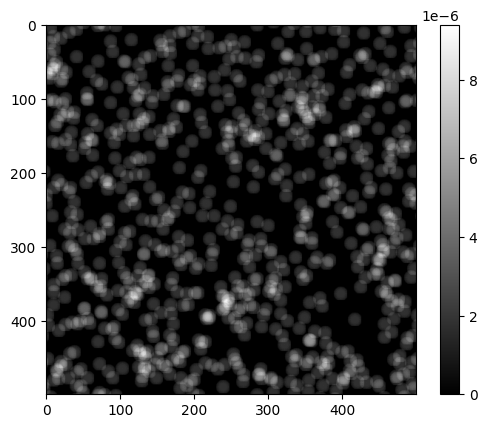

In [2]:
if(type_marker == "Grating"):

    grat = Grating(type = grat_type,
                   px_um = px_um,
                   dc = dc,
                   t_um = grat_t_um,
                   ph_shift = grat_ph_shift,
                   mat = grat_mat,
                   mat_type = grat_mat_type,
                   mat_density= grat_mat_density,
                   n_vert = grat_n_vert)
elif(type_marker == "Sandpaper"):
    grat = Sandpaper(r_um = r_um , 
                     t_um = t_um, 
                     mat_samp = mat_samp, 
                     mat_samp_type = mat_samp_type, 
                     samp_density = samp_density ,
                     mat_bkg = mat_bkg, 
                     mat_bkg_type = mat_bkg_type, 
                     bkg_density = bkg_density ,
                     n_specks = n_specks)

grats = grat.obtain_grat_array()

plt.imshow(grats[0,:,:], cmap="gist_gray")
plt.colorbar()
plt.show()

In [3]:
samp = Sample(t_mm = samp_t_mm, 
              mat_samp = mat_samp, 
              mat_bkg = mat_bkg, 
              mat_samp_type =  mat_samp_type, 
              mat_bkg_type = mat_bkg_type,
              samp_density = samp_density, 
              bkg_density = bkg_density,
              sample_geom=sample_geom)

In [4]:
sim = Simulation(grat=grat, 
                 samp=samp)

In [5]:
functions = Functions()

In [6]:
n_sandpapers = 20

rss_um = np.linspace(2.0, 20.0, n_sandpapers)

#rss_um = np.array([2.0, 4.0, 6.0, 8.0])
#n_sandpapers = rss_um.shape[0]

talbot_carpet = sim.create_Talbot_carpet_multiple_sandpapers(rs_um=rss_um)

100%|██████████| 1000/1000 [00:05<00:00, 170.01it/s]


In [7]:
interact(
    functions.plot_talbot_indiv_vis,
    talbot_carpet = fixed(talbot_carpet),
    x=IntSlider(value=int((talbot_carpet.shape[0]-1)/2), min=0, max=talbot_carpet.shape[0]-1, step=1, description=r'Slice in x'),
    z=IntSlider(value=0, min=0, max=talbot_carpet.shape[2]-1, step=1, description=r'Slice in z')
)


interactive(children=(IntSlider(value=249, description='Slice in x', max=499), IntSlider(value=0, description=…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [8]:
std_talbot_carpet = np.std(talbot_carpet, axis=(0,1))
mean_talbot_carpet = np.mean(talbot_carpet, axis=(0,1))
max_talbot_carpet = np.max(talbot_carpet, axis=(0,1))
min_talbot_carpet = np.min(talbot_carpet, axis=(0,1))

measures = np.array([std_talbot_carpet, mean_talbot_carpet, max_talbot_carpet, min_talbot_carpet])

interact(
    functions.plot_talbot_tot_vis,
    talbot_carpet = fixed(talbot_carpet),
    measures = fixed(measures),
    x=IntSlider(value=int((talbot_carpet.shape[0]-1)/2), min=0, max=talbot_carpet.shape[0]-1, step=1, description=r'Slice in x')
)



interactive(children=(IntSlider(value=249, description='Slice in x', max=499), Output()), _dom_classes=('widge…

<function ipywidgets.widgets.interaction._InteractFactory.__call__.<locals>.<lambda>(*args, **kwargs)>

In [9]:
stds = []
means = []
maxs = []
mins = []

for i in tqdm(range(n_sandpapers)):
    r_init_um = r_um
    #rs_um = r_init_um*np.ones(i+1)
    rs_um = rss_um[:(i+1)]
    talbot_carpet = sim.create_Talbot_carpet_multiple_sandpapers(rs_um=rs_um)

    #talbot_carpet_yz = talbot_carpet[int(talbot_carpet.shape[0]/2), :, :]
    std_talbot_carpet = np.std(talbot_carpet, axis=(0,1))
    mean_talbot_carpet = np.mean(talbot_carpet, axis=(0,1))
    max_talbot_carpet = np.max(talbot_carpet, axis=(0,1))
    min_talbot_carpet = np.min(talbot_carpet, axis=(0,1))

    stds.append(std_talbot_carpet)
    means.append(mean_talbot_carpet)
    maxs.append(max_talbot_carpet)
    mins.append(min_talbot_carpet)


stds = np.array(stds)
means = np.array(means)
maxs = np.array(maxs)
mins = np.array(mins)
    

100%|██████████| 20/20 [04:03<00:00, 12.16s/it]


In [10]:
visibilities = stds**2
#visibilities = stds
#visibilities = means
#visibilities = stds/means
#visibilities = (maxs - mins)/(maxs + mins)

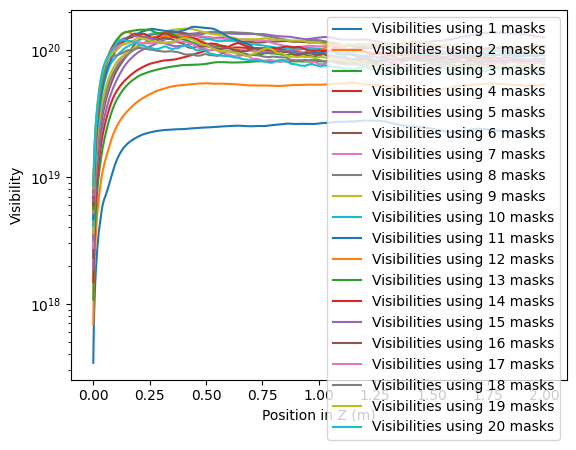

In [11]:
z_axis = np.linspace(initial_z, final_z, n_pixels_z)

for i in range(n_sandpapers):
    plt.plot(z_axis, visibilities[i], label="Visibilities using {} masks".format(i+1))

plt.yscale("log")
plt.xlabel("Position in Z (m)")
plt.ylabel("Visibility")
plt.legend()
plt.show()

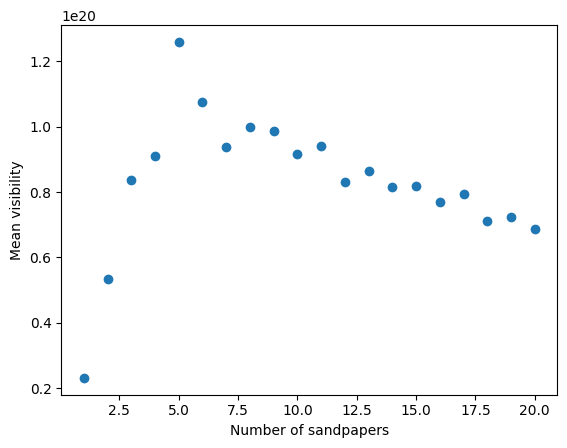

In [12]:
#plt.scatter(np.arange(1, n_sandpapers+1), np.mean(visibilities, axis=1))
plt.scatter(np.arange(1, n_sandpapers+1), visibilities[:,-1])
#plt.yscale("log")
plt.xlabel("Number of sandpapers")
plt.ylabel("Mean visibility")
plt.show()